In [91]:
import numpy as np
import pandas as pd
from time import time
import warnings
warnings.filterwarnings(action="ignore", category=DeprecationWarning)

In [92]:
FIRST_SIZE = 2
LAST_SIZE = 32

COUNT_TRIES = 10

MAX_DEF_COUNT_ITER = 100000
"""Максимальное количество итераций по-умолчанию"""
DEF_EPS = 0.0001
"""Точность по-умолчанию"""

'Точность по-умолчанию'

In [93]:
df = pd.DataFrame(
    columns=[
        "size",
        "true_value_max",
        "true_value_min",
        "value_max",
        "value_max_time",
        "value_min_def",
        "value_min_def_time",
        # "value_min_rel",
        # "value_min_rel_time"
    ],
    index=range(1, (LAST_SIZE - FIRST_SIZE + 1) * COUNT_TRIES + 1),
)
df

,size,true_value_max,true_value_min,value_max,value_max_time,value_min_def,value_min_def_time
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
306,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Подготовка

In [94]:
def calc(A: np.matrix, b: np.matrix) -> np.matrix:
    if b is None:
        print("Вектор собственного значения не был посчитан")
        return None
    return float((b.T @ A @ b) / (b.T @ b))

In [95]:
def output(
    A: np.matrix,
    texts: list[str],
    funcs: list,

    num_iterrations: int = MAX_DEF_COUNT_ITER,
    b_k: np.matrix = None,
    mu: float = None,
) -> tuple[np.matrix, list[float | None]]:

    abs_v = np.abs(np.linalg.eigvals(A))

    abs_v_max = np.max(abs_v)

    abs_v_min = np.min(abs_v)
    # print(

    #     "Собственные значения матрицы A",

    #     f"Максимальное: {abs_v_max}",
    #     f"Минимальное: {abs_v_min}",
    #     sep="\n",
    # )


    # print("========")

    mass_eval = []


    for text, f in zip(texts, funcs):
        start_time = time()
        # print(text)
        if f.__name__ != inverse_power_rel.__name__:
            evec, eval = f(A=A, num_iterations=num_iterrations, b_k=b_k)
            # evec = f(A=A, num_iterations=num_iterrations, b_k=b_k)
            # eval = calc(A, evec)
        else:
            evec, eval = f(A=A, b_k=b_k, mu=mu)
        stop_time = time()
        # print("========")
        mass_eval.append(abs(eval))
        mass_eval.append(stop_time - start_time)


    # print(text_1)

    # first_evec = f_1(A=A, num_iterations=num_iterrations, b_k=b_k)

    # first_eval = calc(A, first_evec)
    # print("========")


    # print(text_2)

    # if f_2.__name__ != inverse_power_rel.__name__:

    #     second_evec = f_2(A=A, num_iterations=num_iterrations, b_k=b_k)

    #     second_eval = calc(A, second_evec)

    # else:

    #     second_evec, second_eval = f_2(A=A, b_k=b_k, mu=mu)
    # print("========")

    # print(


    #     "Собственные векторы:",

    #     f"{text_1}:",
    #     first_evec,


    #     f"{text_2}:",

    #     second_evec,

    #     sep="\n",
    # )
    # print(


    #     "Собственные значения:",

    #     f"{text_1}: {first_eval}",

    #     f"{text_2}: {second_eval}",

    #     sep="\n",
    # )


    return A.shape[0], abs_v_max, abs_v_min, *mass_eval

# Прямой метод

$x^{(k)} = \dfrac{Ax^{(k - 1)}}{\alpha_{k - 1}}$

$\lambda_{1}(A) = \dfrac{\left( Ax^{(k)}, x^{(k)} \right)}{(x^{(k)}, x^{(k)})} = \dfrac{(x^{(k)})^{T}A^{(k)}x^{(k)}}{(x^{(k)})^{T}x^{(k)}}$, где $|\lambda_1(A)|$ - наибольшее по модулю СЗ

In [96]:
def power_iteration(
    A: np.matrix,
    epsilon: float = DEF_EPS,
    num_iterations=MAX_DEF_COUNT_ITER,
    b_k: np.matrix = None,
) -> np.matrix:
    if b_k is None:
        b_k = np.random.rand(A.shape[1], 1)
    # print("Начальное приближение:", b_k, sep="\n")

    alpha_old = None

    # for _ in range(num_iterations):
    while True:
        b_k1 = np.dot(A, b_k)

        b_k1_norm = np.linalg.norm(b_k1)

        b_k = b_k1 / b_k1_norm

        alpha_new = calc(A, b_k)
        if alpha_old is not None and abs(alpha_new - alpha_old) < epsilon:
            break
        alpha_old = alpha_new

    return b_k, alpha_new

# Обратный метод

## Стандартная версия

In [97]:
def inverse_power_def(
    A: np.matrix,
    epsilon: float = DEF_EPS,
    num_iterations=MAX_DEF_COUNT_ITER,
    b_k: np.matrix = None,
) -> np.matrix:
    try:
        inv_A = np.linalg.inv(A)
    except np.linalg.LinAlgError:
        print("Вырожденная матрица")
        return None
    # print("Обратная матрица:",inv_A, sep="\n")
    res = power_iteration(
        A=inv_A, epsilon=epsilon, num_iterations=num_iterations, b_k=b_k
    )
    return res[0], 1 / res[1]

In [98]:
# A: np.matrix = np.matrix("1 3 -2 0;"
#                          "1 1 4 7;"
#                          "4 7 11 23;"
#                          "52 66 2 0")  # -0.65
# calc(A, inverse_power_def(A))

## Модификация Релэя

In [99]:
import random


def inverse_power_rel(A, epsilon: float = DEF_EPS, num_iterations = MAX_DEF_COUNT_ITER, mu = None, b_k = None):
  if b_k is None:
      b_k = np.random.rand(A.shape[1], 1) # Попробовать близкий к настоящему собственный вектор
  if mu is None:
    mu = random.randint(1, 19) / 10 # Случайное начальное приближение
  print("Начальное приближение:", "СЗ:", mu, "СВ:", b_k, sep="\n")
  
  b_k = b_k / np.linalg.norm(b_k)
  y = np.linalg.solve(A - mu * np.eye(A.shape[0]), b_k)
  # print(y)
  # print(x)
  lambda_ = float(np.dot(y.T, b_k))
  # print(lambda_, lambda_ * x)
  mu = mu + 1 / lambda_
  err = np.linalg.norm(y - lambda_ * b_k) / np.linalg.norm(y)
  
  index = 0
  while err > epsilon or index < num_iterations:
    b_k = y / np.linalg.norm(y)
    y = np.linalg.solve(A - mu * np.eye(A.shape[0]), b_k)
    lambda_ = float(np.dot(y.T, b_k))
    mu = mu + 1 / lambda_
    err = np.linalg.norm(y - lambda_ * b_k) / np.linalg.norm(y)
    index += 1

  return b_k, float(mu)


In [100]:
A: np.matrix = np.matrix("1 -2 -1;"
                         "-1 1 1;"
                         "1 0 -1")  # 0, 2, -1
# Сильно зависит от начального приближения
# Не вижу в ней смысла
# A, calc(A, power_iteration(A, 1000)), inverse_power_rel(A, 0.0001)[1]
# calc(A, inverse_power_rel(A)[0])

In [101]:
def generate_non_singular(n):
    while True:
        # Генерируем случайную матрицу n x n
        matrix = np.random.rand(n, n)  # Вы можете использовать np.random.randint для целых чисел.
        if np.linalg.det(matrix) != 0:  # Проверяем, что определитель не равен нулю
            return matrix

In [102]:
import numpy as np
# texts = ["Прямые итерации", "Обратные итерации (обычные)", "Обратные итерации (Релэя)"]
# funcs = [power_iteration, inverse_power_def, inverse_power_rel]
texts = ["Прямые итерации", "Обратные итерации (обычные)"]
funcs = [power_iteration, inverse_power_def]
mass = []

for i in range(FIRST_SIZE, LAST_SIZE + 1):
    print(f"Current size:{i}")
    for j in range(COUNT_TRIES):
        print(j + 1)
        matr = generate_non_singular(i)
        df.iloc[(i - FIRST_SIZE) * COUNT_TRIES + j] = output(matr, texts, funcs)
    print()

df["delta_max"] = abs(df["true_value_max"] - df["value_max"])
df["delta_min"] = abs(df["true_value_min"] - df["value_min_def"])

df

Current size:2
1
2
3
4
5
6
7
8
9
10

Current size:3
1
2
3
4
5
6
7
8
9
10

Current size:4
1
2
3
4
5
6
7
8
9
10

Current size:5
1
2
3
4
5
6
7
8
9
10

Current size:6
1
2
3
4
5
6
7
8
9
10

Current size:7
1
2
3
4
5
6
7
8
9
10

Current size:8
1
2
3
4
5
6
7
8
9
10

Current size:9
1
2
3
4
5
6
7
8
9
10

Current size:10
1
2
3
4
5
6
7
8
9
10

Current size:11
1
2
3
4
5
6
7
8
9
10

Current size:12
1
2
3
4
5
6
7
8
9
10

Current size:13
1
2
3
4
5
6
7
8
9
10

Current size:14
1
2
3
4
5
6
7
8
9
10

Current size:15
1
2
3
4
5
6
7
8
9
10

Current size:16
1
2
3
4
5
6
7
8
9
10

Current size:17
1
2
3
4
5
6
7
8
9
10

Current size:18
1
2
3
4
5
6
7
8
9
10

Current size:19
1
2
3
4
5
6
7
8
9
10

Current size:20
1
2
3
4
5
6
7
8
9
10

Current size:21
1
2
3
4
5
6
7
8
9
10

Current size:22
1
2
3
4
5
6
7
8
9
10

Current size:23
1
2
3
4
5
6
7
8
9
10

Current size:24
1
2
3
4
5
6
7
8
9
10

Current size:25
1
2
3
4
5
6
7
8
9
10

Current size:26
1
2
3
4
5
6
7
8
9
10

Current size:27
1
2
3
4
5
6
7
8
9
10

Current size:28
1
2


,size,true_value_max,true_value_min,value_max,value_max_time,value_min_def,value_min_def_time,delta_max,delta_min
1,2,1.23838,0.672459,1.238468,0.000994,0.672406,0.0,0.000089,0.000053
2,2,0.793664,0.098175,0.79366,0.0,0.098175,0.0,0.000004,0.0
3,2,1.058375,0.137595,1.05837,0.0,0.137595,0.0,0.000004,0.0
4,2,0.975569,0.240991,0.975542,0.0,0.24099,0.0,0.000027,0.000001
5,2,0.872015,0.214948,0.872033,0.0,0.214949,0.0,0.000018,0.0
...,...,...,...,...,...,...,...,...,...
306,32,16.038912,0.034451,16.038908,0.0,0.034451,0.0,0.000004,0.0
307,32,16.011617,0.419832,16.011613,0.0,2.996701,0.611809,0.000005,2.576869
308,32,15.74537,0.383982,15.745362,0.0,0.328139,0.022993,0.000008,0.055843
309,32,15.302042,0.393648,15.302048,0.0,0.61827,0.116782,0.000006,0.224621


In [103]:
df.sort_values("delta_max", ascending=False).head(10)

,size,true_value_max,true_value_min,value_max,value_max_time,value_min_def,value_min_def_time,delta_max,delta_min
37,5,2.694019,0.463732,2.695025,0.0,0.463744,0.0,0.001006,0.000012
91,11,4.812223,0.118385,4.81206,0.0,0.118385,0.0,0.000163,0.0
245,26,12.748063,0.059741,12.747912,0.0,0.059741,0.0,0.000151,0.0
10,2,0.925491,0.586247,0.925618,0.0,0.586189,0.0,0.000127,0.000058
229,24,12.074591,0.317254,12.074466,0.0,0.682219,0.100174,0.000124,0.364965
26,4,2.029309,0.375396,2.029196,0.0,0.375632,0.0,0.000113,0.000236
287,30,15.290101,0.077608,15.289997,0.0,0.077608,0.0,0.000104,0.0
155,17,8.437039,0.225335,8.436938,0.0,0.225325,0.0,0.0001,0.00001
20,3,1.223056,0.103962,1.222965,0.0,0.103962,0.0,0.00009,0.0
1,2,1.23838,0.672459,1.238468,0.000994,0.672406,0.0,0.000089,0.000053


In [104]:
df.sort_values("delta_min", ascending=False).head(10)

,size,true_value_max,true_value_min,value_max,value_max_time,value_min_def,value_min_def_time,delta_max,delta_min
132,15,7.1511,0.341446,7.151117,0.0,57.269906,1.584726,0.000017,56.92846
42,6,2.90292,0.181829,2.902932,0.0,31.351171,1.103803,0.000012,31.169341
196,21,10.513045,0.168789,10.51304,0.0,10.099162,5.131798,0.000005,9.930373
101,12,6.201502,0.298906,6.201506,0.0,6.976209,0.430609,0.000005,6.677303
199,21,10.63641,0.109459,10.63641,0.0,6.558319,15.402249,0.0,6.44886
16,3,1.600781,0.271637,1.600784,0.0,4.623325,0.664262,0.000003,4.351688
79,9,4.60888,0.276065,4.608883,0.0,4.254817,0.066658,0.000002,3.978752
289,30,15.237194,0.146228,15.237199,0.0,3.934116,5.828753,0.000005,3.787887
218,23,11.51381,0.336571,11.513829,0.0,3.60844,0.601171,0.000019,3.271869
274,29,14.351748,0.345811,14.351756,0.0,3.584671,1.58642,0.000008,3.23886


# Графическая часть

In [105]:
import matplotlib.pyplot as plt

In [106]:
res_df = df[["size", "value_max_time", "value_min_def_time", "delta_max", "delta_min"]]
plt.figure(figsize=(10, 5))
x = range(FIRST_SIZE, LAST_SIZE + 1)
x_lt = np.linspace(FIRST_SIZE, LAST_SIZE)
res_df

,size,value_max_time,value_min_def_time,delta_max,delta_min
1,2,0.000994,0.0,0.000089,0.000053
2,2,0.0,0.0,0.000004,0.0
3,2,0.0,0.0,0.000004,0.0
4,2,0.0,0.0,0.000027,0.000001
5,2,0.0,0.0,0.000018,0.0
...,...,...,...,...,...
306,32,0.0,0.0,0.000004,0.0
307,32,0.0,0.611809,0.000005,2.576869
308,32,0.0,0.022993,0.000008,0.055843
309,32,0.0,0.116782,0.000006,0.224621


<Figure size 1000x500 with 0 Axes>

In [107]:
max(res_df["delta_min"])

np.float64(56.92845972510958)

In [108]:
mean_res = res_df.groupby("size").mean()

5.790699519696719


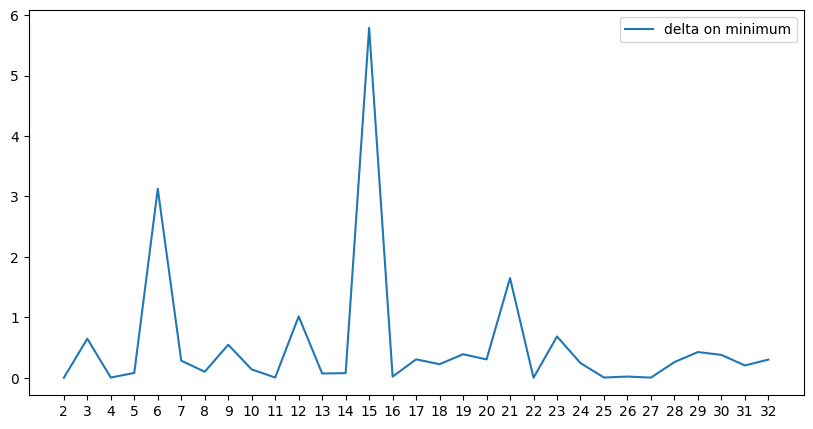

In [109]:
print(max(mean_res['delta_min']))
plt.figure(figsize=(10, 5))
plt.xticks(ticks=x)

plt.plot(mean_res["delta_min"])
plt.legend(["delta on minimum"])
# mean_res.plot()

0.00011600331219998594


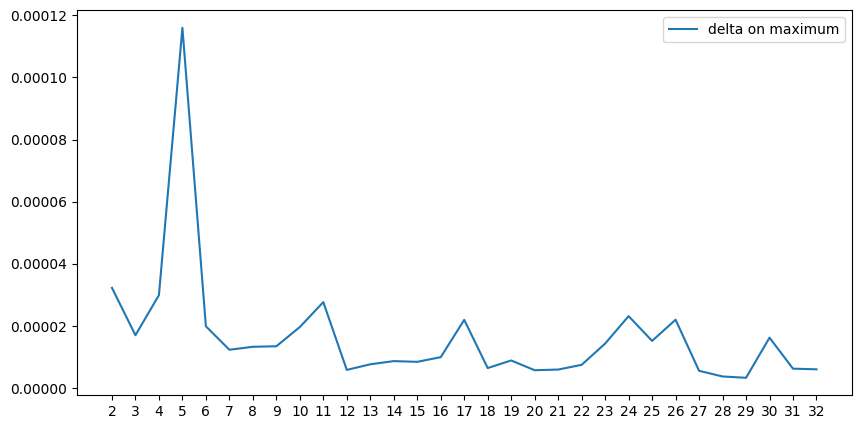

In [110]:
print(max(mean_res['delta_max']))
plt.figure(figsize=(10, 5))
plt.xticks(ticks=x)
plt.plot(mean_res["delta_max"])
plt.legend(["delta on maximum"])

<Figure size 1000x500 with 0 Axes>

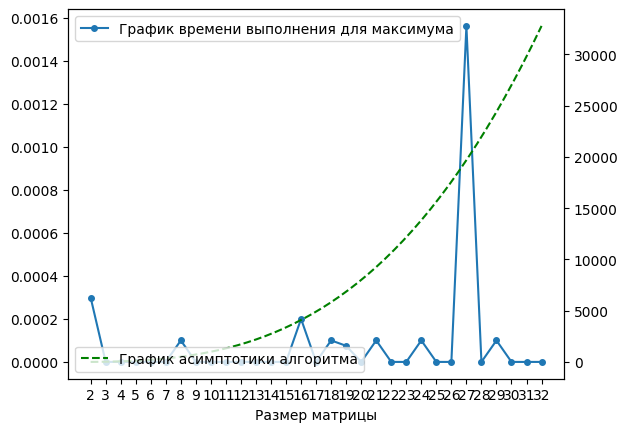

In [111]:
plt.figure(figsize=(10, 5))

fig, ax1 = plt.subplots()

ax1.plot(mean_res['value_max_time'],  marker='o',  markersize=4, label='График времени выполнения для максимума')
ax1.set_xlabel('Размер матрицы')
ax1.set_xticks(x)

ax2 = ax1.twinx()

ax2.plot(x_lt, x_lt ** 3, color='green', linestyle='--', label='График асимптотики алгоритма')

ax1.legend(loc='upper left')
ax2.legend(loc='lower left')

plt.show()
# plt.xticks(ticks=x)
# plt.legend(["time for calculation of maximum"])


<Figure size 1000x500 with 0 Axes>

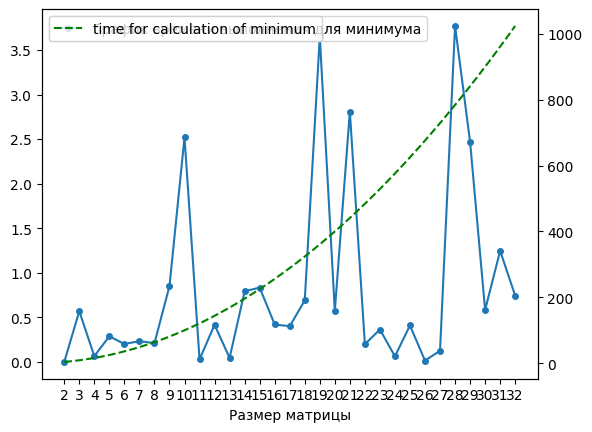

In [112]:
plt.figure(figsize=(10, 5))

fig, ax1 = plt.subplots()

ax1.plot(mean_res['value_min_def_time'],  marker='o',  markersize=4, label='График времени выполнения для минимума')
ax1.set_xlabel('Размер матрицы')
ax1.set_xticks(x)

ax2 = ax1.twinx()

ax2.plot(x_lt, x_lt ** 2, color='green', linestyle='--', label='График асимптотики алгоритма')

ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
# plt.plot(x=x, y=x**2)
plt.legend(["time for calculation of minimum"])

In [113]:
# df.to_csv("data/df.csv")
# res_df.to_csv("data/res_df.csv")